# Stock Price Forecasting for Apollo Tyres Ltd.

### Introduction
In today's volatile financial markets, the ability to forecast stock price movements is a critical asset for investors, financial analysts, and business strategists. **Predictive analytics** provides a powerful toolkit to analyze historical data, uncover underlying patterns, and generate data-driven forecasts that can inform investment decisions, manage risk, and support portfolio planning. The accuracy of these predictions can directly impact financial outcomes, making time series forecasting a cornerstone of modern business analytics.


### Project Objective
This project addresses the challenge of forecasting the stock price of **Apollo Tyres Ltd.**, a key player in the automotive components sector. The primary objective is to build and evaluate a **univariate time series forecasting model** using one year of daily closing price data. The dataset is particularly interesting as the automotive industry is cyclical and sensitive to broader economic trends. This analysis seeks to answer the question:

> *Can historical stock price data be effectively modeled to generate statistically sound short-term forecasts with practical business relevance?*


### Analytical Process
The analytical process will follow several key steps.
1.  First, an initial **exploratory analysis** and **time series decomposition** will be performed to identify the underlying trend, seasonality, and noise components.
2.  The series will then be tested for **stationarity**, a crucial prerequisite for reliable forecasting, using the **Augmented Dickey-Fuller (ADF) test**.
3.  Subsequently, two distinct forecasting models will be implemented and compared.


### Models for Comparison
The following models will be developed and evaluated:

* **Simple Moving Average (SMA):** A smoothing technique used to identify the underlying trend and establish a baseline forecast.
* **ARIMA (Auto-Regressive Integrated Moving Average):** A more sophisticated statistical model that captures complex patterns in the data to generate more nuanced predictions.

The ultimate objective is not only to generate these forecasts but also to interpret the results in a practical business context, where predictions of stock movements can support investment decision-making, risk management, and portfolio planning.

### Assumption of time series data 
- The variable data should be stationarity/stationary(stationerity = mean and variance should be constant over a period of time ) and should not contain trend, seasonal, irregular, and cyclical variations 



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df =pd.DataFrame(pd.read_csv('CIA_3.csv'))

In [3]:
df.head()

,Date,close
0,9/2/2024,499.35
1,9/3/2024,502.90
2,9/4/2024,508.70
3,9/5/2024,512.00
4,9/6/2024,507.75


In [4]:
df.isnull().sum()

Date      0
close     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    248 non-null    object 
 1   close   248 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [6]:
df.columns = df.columns.str.strip()

In [7]:
print(df.columns.tolist())

['Date', 'close']


In [8]:
df['Date']=df['Date'].str.replace(",","")


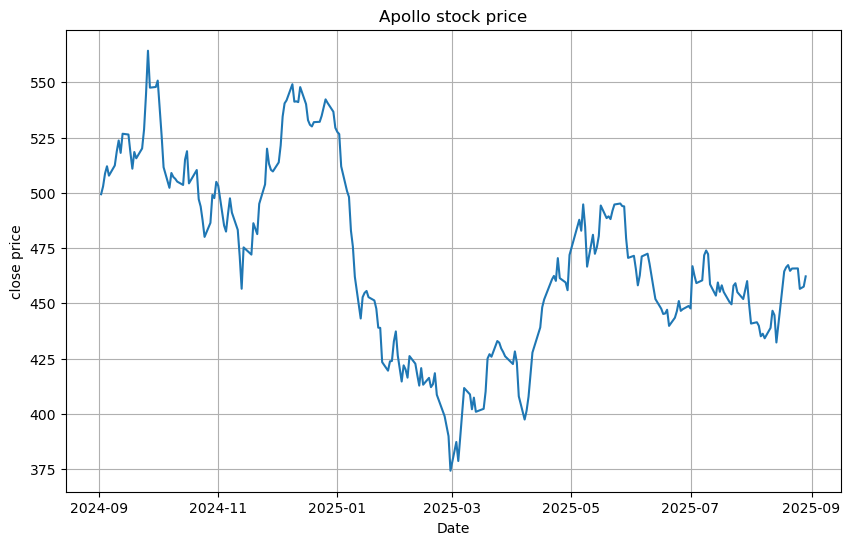

In [9]:
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'], format ='%m/%d/%Y')
df = df.set_index('Date')
plt.figure(figsize = (10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('close price')
plt.plot(df['close'])
plt.title('Apollo stock price')
plt.show()

### Interpretation: Visual Analysis of Stationarity
This plot shows the daily closing price of Apollo Tyres over the one-year period. A key assumption for many time series models, including ARIMA, is that the data must be stationary (i.e., its mean, variance, and autocorrelation are constant over time).

From this graph, we can visually observe a clear trend. The mean price is not constant; it drifts over time. This visual evidence strongly suggests that the time series is non-stationary.


### Distribution of the closing price

<Axes: ylabel='Density'>

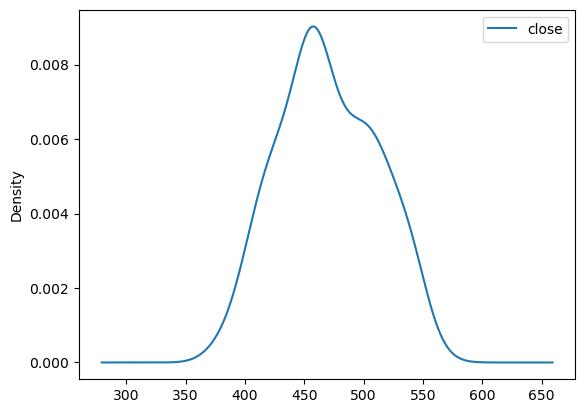

In [10]:
df.plot(kind='kde')

### Distribution of Closing Prices
This Kernel Density Estimate (KDE) plot shows the distribution of the closing prices. We can see that the distribution is roughly unimodal (has one peak), centered around the 500-525 price range. It gives us a sense of the most frequent price points in the dataset.

### Forecasting Model 1: Simple Moving Average (SMA)

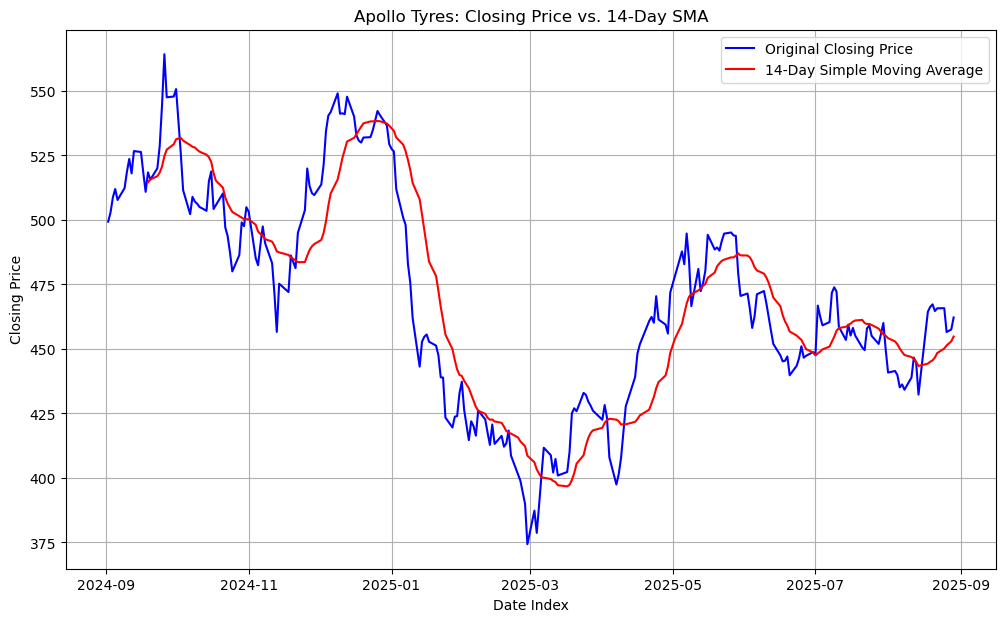

The Simple Moving Average forecast for the next day is: 454.81


In [11]:
# We'll use a 14-day window, a common period for short-term stock analysis.
df['SMA_14'] = df['close'].rolling(window=14).mean()

# Plot the original closing price against the SMA
plt.figure(figsize=(12, 7))
plt.grid(True)
plt.plot(df['close'], label='Original Closing Price', color='blue')
plt.plot(df['SMA_14'], label='14-Day Simple Moving Average', color='red')
plt.title('Apollo Tyres: Closing Price vs. 14-Day SMA')
plt.xlabel('Date Index')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

last_sma_value = df['SMA_14'].iloc[-1]
print(f"The Simple Moving Average forecast for the next day is: {last_sma_value:.2f}")

### Simple Moving Average
The Simple Moving Average (SMA) is a basic forecasting technique that smooths out short-term price fluctuations to highlight the longer-term trend.

The Plot: The graph above shows the original closing price (in blue) and the 14-day SMA (in red). As you can see, the SMA line is much smoother than the volatile daily price line, giving a clearer indication of the overall price direction.

Forecasting: The forecast for the next day using this method is simply the last calculated value of the moving average. This method assumes that the next data point will be similar to the average of the most recent past data.

Limitations: While simple to implement, SMA has a significant lag. It reacts to price changes rather than predicting them, which can be a drawback for volatile stock data. It's generally best for identifying trends rather than making precise, long-term forecasts.

In [12]:
moving_average=pd.DataFrame({
    " closeprice ":df['close'],
    "SMA_14":df['close'].rolling(window=14).mean()
})
print(moving_average)

             closeprice       SMA_14
Date                                
2024-09-02        499.35         NaN
2024-09-03        502.90         NaN
2024-09-04        508.70         NaN
2024-09-05        512.00         NaN
2024-09-06        507.75         NaN
...                  ...         ...
2025-08-22        465.75  448.417857
2025-08-25        465.80  450.157143
2025-08-26        456.55  451.350000
2025-08-28        457.55  452.953571
2025-08-29        462.20  454.807143

[248 rows x 2 columns]


### Test for Stationarity

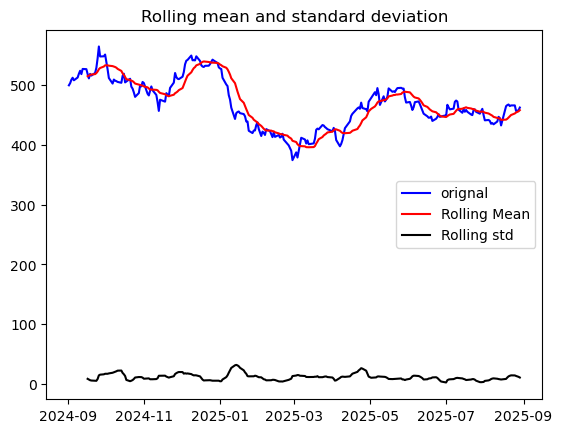

Result of dickey fuller test
Teststatistics          -1.804043
p_value                  0.378456
Number of lag used       1.000000
observation used       246.000000
critical Value(1%)      -3.457215
critical Value(5%)      -2.873362
critical Value(10%)     -2.573070
dtype: float64


In [13]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    rolmean=timeseries.rolling(12).mean()
    rolstd= timeseries.rolling(12).std()
    plt.plot(timeseries,color = "blue",label = "orignal")
    plt.plot(rolmean,color="red",label = "Rolling Mean")
    plt.plot(rolstd,color = "black",label ="Rolling std")
    plt.legend(loc="best")
    plt.title("Rolling mean and standard deviation")
    plt.show(block= False)
    print ("Result of dickey fuller test")
    adft = adfuller(timeseries,autolag ="AIC")#aic = akaike information critaim
    output =pd.Series(adft[0:4],index = ["Teststatistics","p_value","Number of lag used","observation used"])
    for key,values in adft [4].items():
        output['critical Value(%s)'%key]=values
    print (output)
test_stationarity(df['close'])    

### Augmented Dickey-Fuller (ADF) Test Results
*To statistically confirm our visual observation, we use the ADF test.*

Null Hypothesis (H0): The data has a unit root and is non-stationary.

Alternative Hypothesis (H1): The data is stationary.

The results show a p-value of 0.378. Since this value is much greater than the significance level of 0.05, we fail to reject the null hypothesis.

Conclusion: The ADF test confirms that our time series data is non-stationary. We must convert the data into stationarity by taking a log transformation.

In [14]:
#To separate the trend and seasonality from time series data, we will decompose 

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose 

<Figure size 640x480 with 0 Axes>

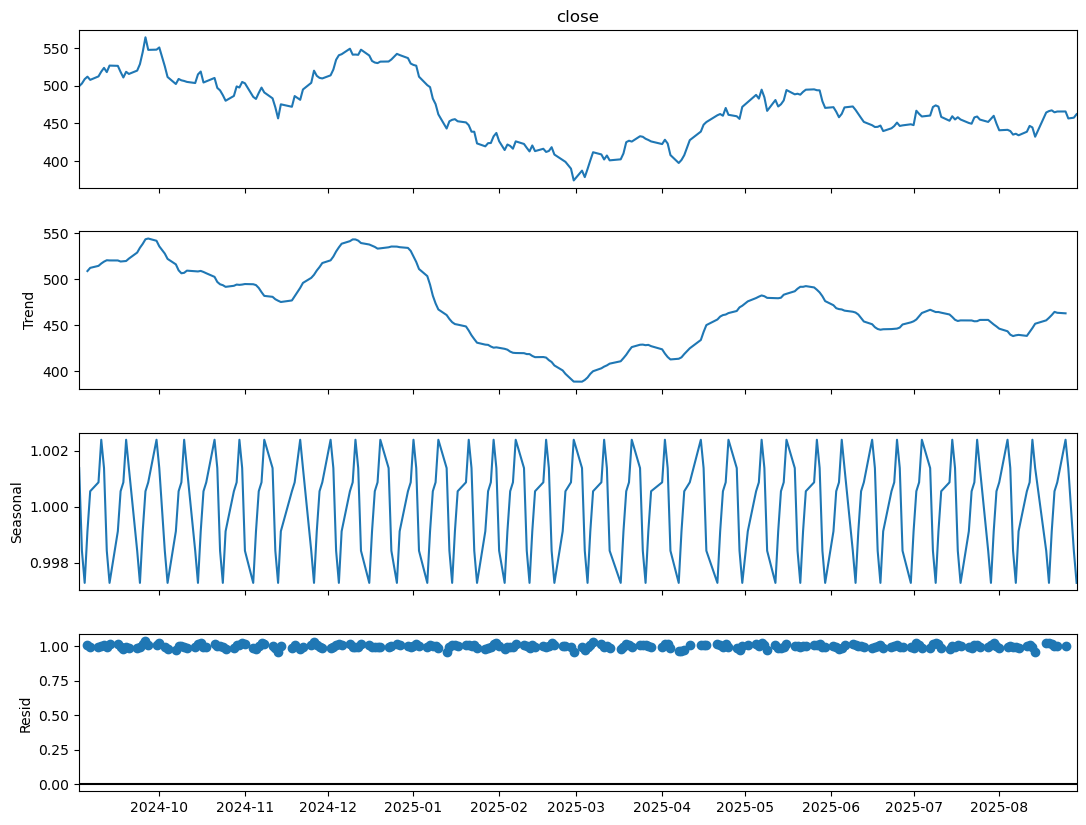

In [16]:
result = seasonal_decompose(df['close'],model = "multiplicative", period = 7)
fig = plt.figure ()
fig = result.plot()
fig.set_size_inches(12,9)#sets the size

### Time Series Decomposition
Decomposing the series allows us to see its underlying components:

Trend: This clearly shows the long-term direction of the price, confirming the trend we saw earlier.

Seasonal: This captures a repeating weekly pattern.

Residual: This represents the random noise in the data after removing the trend and seasonal components. Ideally, the residuals should be random with no discernible pattern.

### Log Transformation (to convert the data into stationarity)

C:\Users\hp\AppData\Local\Temp\ipykernel_5688\30080142.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')


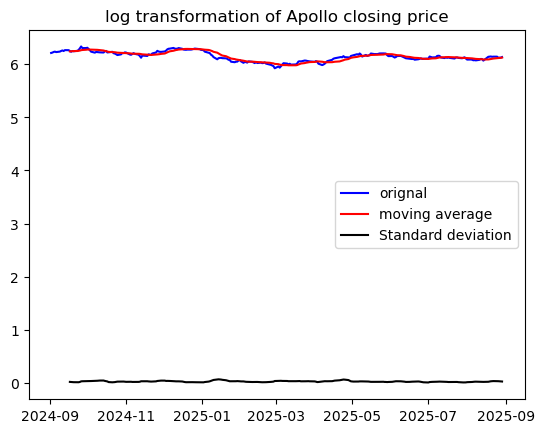

Result of dickey fuller test
Teststatistics          -1.806405
p_value                  0.377286
Number of lag used       1.000000
observation used       246.000000
critical Value(1%)      -3.457215
critical Value(5%)      -2.873362
critical Value(10%)     -2.573070
dtype: float64


In [17]:
from statsmodels.tsa.stattools import adfuller  
df_log = np.log(df['close'])
moving_average = df_log.rolling(12).mean()
moving_std = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title("log transformation of Apollo closing price")
plt.plot(df_log,color = "blue",label = "orignal")
plt.plot(moving_average,color="red",label = "moving average")
plt.plot(moving_std,color = "black",label ="Standard deviation")
plt.legend(loc='best')
plt.show()

def test_stationarity(df):
    print ("Result of dickey fuller test")
    adft = adfuller(df_log,autolag ="AIC")#aic = akaike information critaim
    output =pd.Series(adft[0:4],
                  index = ["Teststatistics","p_value","Number of lag used","observation used"])
    for key,values in adft [4].items():
        output['critical Value(%s)'%key]=values
    print (output)
test_stationarity(df_log)  

#### => After converting into log transformation still the data is still non-stationary because the probability value of ADF test is greater than 0.05. 

##### For the next step we have to take the first difference to convert the data into stationarity 

### Code for 1st Differencing 

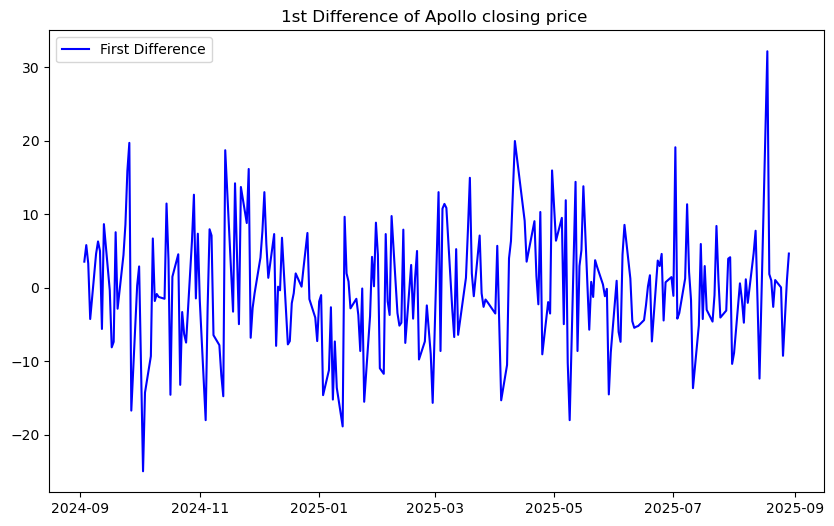

Result of dickey fuller test
Teststatistics        -1.415598e+01
p_value                2.121333e-26
Number of lag used     0.000000e+00
observation used       2.460000e+02
critical Value(1%)    -3.457215e+00
critical Value(5%)    -2.873362e+00
critical Value(10%)   -2.573070e+00
dtype: float64


In [18]:
df_diff = df['close'].diff().dropna()
plt.figure(figsize=(10,6))
plt.plot(df_diff,color='blue',label = 'First Difference')
plt.title("1st Difference of Apollo closing price ")
plt.legend()
plt.show()
def test_stationarity(df):
    print ("Result of dickey fuller test")
    adft = adfuller(df_diff,autolag ="AIC")#aic = akaike information critaim
    output =pd.Series(adft[0:4],
                  index = ["Teststatistics","p_value","Number of lag used","observation used"])
    for key,values in adft [4].items():
        output['critical Value(%s)'%key]=values
    print (output)
test_stationarity(df_diff) 

### Results after 1st Differencing
After applying first-order differencing, we can see from the plot that the trend has been removed, and the series now appears to hover around a constant mean of zero.

The ADF test results confirm this:

p-value: The p-value is now extremely small (2.12
times10 
−26
 ), which is far below 0.05.

Conclusion: We can now reject the null hypothesis. The data is stationary after one round of differencing. This means for our ARIMA model, the d (differencing) parameter will be 1.

## Forecasting model 2

### Automatic ARIMA Model Selection
Now that our data is stationary, we need to find the optimal values for the p (autoregressive order) and q (moving average order) parameters of the ARIMA model. We will use the auto_arima function, which automatically searches for the best combination of (p, d, q) that minimizes the AIC (Akaike Information Criterion), a measure of model quality.

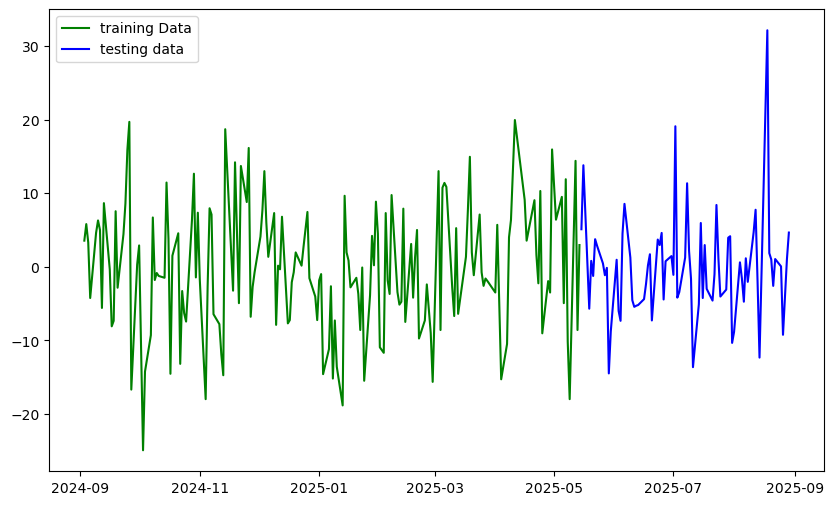

In [19]:
#split the data into train and testing 
split = int(len(df_diff)*0.7) 
train_data= df_diff[:split]
test_data= df_diff[split:]
plt.figure (figsize =(10,6))
plt.grid = (True)
plt.Xlabel = ('Dates')
plt.Ylabel = ('Closing Price')
plt.plot(train_data,'green',label= 'training Data')
plt.plot(test_data,'blue',label = 'testing data')
plt.legend()

### Train-Test Split
To evaluate our forecasting model, we've split the stationary (first-differenced) data into a training set and a testing set.

The Training Data (green), which makes up the first 70% of the series, will be used to train our ARIMA model.

The Testing Data (blue), consisting of the remaining 30%, will be held back. We will use this data to test how accurately our trained model can predict future values it has never seen before. This process is crucial for assessing the model's real-world performance

In [20]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [21]:
from statsmodels.tsa.arima.model import ARIMA 
from pmdarima.arima import auto_arima

In [22]:
split = int(len(df)*0.7)
train_data = df['close'][:split]
test_data = df['close'][split:]


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1232.638, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1231.843, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1232.130, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1230.683, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1233.378, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.220 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  173
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -614.341
Date:                Mon, 22 Sep 2025   AIC                           1230.683
Time:                        13:45:01   BIC                           1233.830
Sample:                             0   HQIC                          1231.960
                                - 173                                       

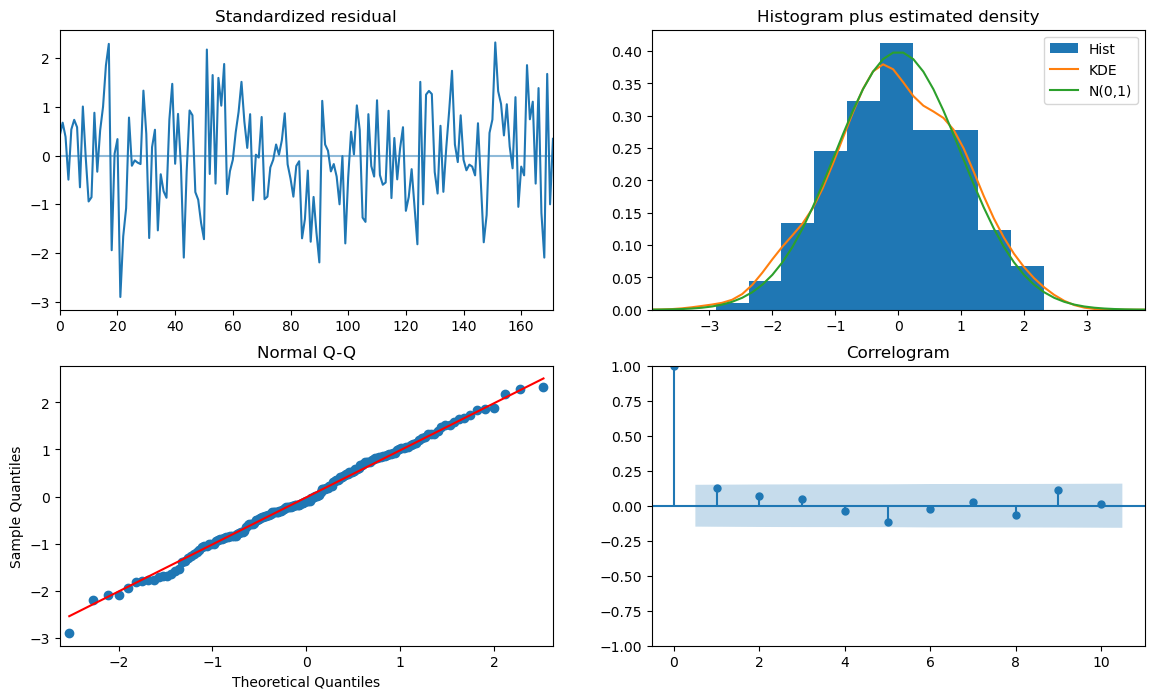

In [23]:
model_autoARIMA = auto_arima(train_data, start_p=0,start_q=0,#These tell the search to start with the simplest models, beginning with p=0 (no autoregressive terms) and q=0 (no moving average terms).
                             test='adf',#It specifies that the Augmented Dickey-Fuller (ADF) test should be used to determine if the data is stationary. The result of this test helps auto_arima decide the value of d
                             max_p=3,max_q=3,#The function will not test any models with more than 3 AR lags (p) or 3 MA lags (q). This keeps the search from taking too long.
                             m=1,#means you are telling the model your data has no seasonal cycle (e.g., it's not monthly data with a yearly pattern where m=12
                             d=None,# By setting d to None, you are instructing auto_arima to figure out the best order of differencing for you, using the 'adf'
                             seasonal=False,#This explicitly tells the function that you are not interested in a seasonal model (SARIMA). You are only looking for a standard ARIMA model.
                             start_P=0,#means no seasonal auto regressive
                             D=0,#means no seasonal differencing
                             trace =True,
                             error_action ='ignore',
                             suppress_warnings=True, #These are practical settings. Sometimes, a specific combination of (p,d,q) will fail to produce a valid model. These arguments tell the function to simply ignore those errors and warnings and continue searching for the best model without crashing.
                             stepwise=True) #Instead of trying every single combination of p and q, it uses a smart, stepwise algorithm to navigate the parameter space and find the best model more quickly.


print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(14,8))
plt.show()

      


                            
                             


### Auto_arima Results and Diagnostics
 Fitting the ARIMA(0,1,0) Model
Based on the auto_arima results, we are now fitting an ARIMA(0,1,0) model to the original training data. This model is often referred to as a random walk model.

#### Fitting the ARIMA(0,1,0) Model
After estimating the ARIMA model, we must perform residual diagnostics to check whether the model is a good fit for forecasting. The key assumptions are that the residuals are uncorrelated (no autocorrelation) and have a constant variance (homoscedasticity).

The model summary provides the following insights:

Coefficients: An ARIMA(0,1,0) model has no autoregressive (p=0) or moving average (q=0) terms. Therefore, there are no ar or ma coefficients to interpret. The model's entire structure is based on differencing (d=1).

Core Idea: This model assumes that the difference between consecutive observations is white noise (random). In practical terms, it means the best forecast for the next day's stock price is simply the last known price.

Ljung-Box Test: The Prob(Q) is 0.09, which is much greater than 0.05. This indicates that the residuals are not correlated and resemble white noise, which is a good sign for the model fit.
H0: There is no autocorrelation between the error terms.

H1: There is autocorrelation between the error terms.

The Prob(Q) is 0.09, which is much greater than 0.05. This indicates that the residuals are not correlated and resemble white noise, which is a good sign for the model fit.

Heteroskedasticity (H) Test: This test checks if the variance of the error terms is constant (homoscedasticity).

H0: The error terms are homoscedastic.

H1: The error terms are heteroscedastic.

The p-value (Prob(H)) is 0.53, which is greater than 0.05. Therefore, we accept the null hypothesis (H0) and conclude that the residuals are homoscedastic, a desired outcome.

Jarque-Bera Test: The Prob(JB) is 0.68, also well above 0.05, suggesting the residuals are normally distributed.

Conclusion: auto_arima has determined that a simple random walk is the most statistically sound model for this data. This often happens in financial markets, where price movements can be highly unpredictable. The model diagnostics confirm that the residuals behave randomly, validating this choice

#### Diagnostic Plots:

Standardized Residual: The residuals plot shows no obvious patterns or trends, and behaves randomly, which is what we want.

Histogram plus estimated density: The histogram closely follows the shape of a normal distribution curve.

Normal Q-Q: The points lie fairly close to the red line, indicating normality.

Correlogram (ACF): Almost all autocorrelation bars are within the blue confidence interval, confirming that the residuals are not correlated.

Conclusion: auto_arima has determined that a simple random walk is the most statistically sound model for this data. This often happens in financial markets, where price movements can be highly unpredictable. The model diagnostics confirm that the residuals behave randomly, validating this choice

### Create an ARIMA model with provided optimum parameters (0,1,0)

In [24]:
model = ARIMA(train_data,order=(0,1,0))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  173
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -614.341
Date:                Mon, 22 Sep 2025   AIC                           1230.683
Time:                        13:45:01   BIC                           1233.830
Sample:                             0   HQIC                          1231.960
                                - 173                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        74.1157      8.627      8.591      0.000      57.207      91.025
Ljung-Box (L1) (Q):                   2.83   Jarque-Bera (JB):                 0.78
Prob(Q):                              0.09   Pr

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [25]:
forecast_object= fitted.get_forecast(steps= 120)
fc = forecast_object.predicted_mean
conf = forecast_object.conf_int(alpha = 0.05)
se = forecast_object.se_mean
Forecast_df = pd.DataFrame({'Day':fc.index,# assigning all the values systematically in the dictionarydictionary  
                          'predicted Mean':fc.values,
                          'Lower_Bound':conf.iloc[:,0].values,
                          'Upper_Bound':conf.iloc[:,1].values,
                          'std_error':se.values})
pd.set_option('display.max_rows',None)# makes sure all rows are displayed and nothing is left
print(Forecast_df)

     Day  predicted Mean  Lower_Bound  Upper_Bound  std_error
0    173          475.35   458.476576   492.223424   8.609048
1    174          475.35   451.487375   499.212625  12.175033
2    175          475.35   446.124372   504.575628  14.911309
3    176          475.35   441.603152   509.096848  17.218096
4    177          475.35   437.619876   513.080124  19.250417
5    178          475.35   434.018720   516.681280  21.087775
6    179          475.35   430.707116   519.992884  22.777400
7    180          475.35   427.624749   523.075251  24.350065
8    181          475.35   424.729727   525.970273  25.827144
9    182          475.35   421.991547   528.708453  27.224201
10   183          475.35   419.387183   531.312817  28.552982
11   184          475.35   416.898744   533.801256  29.822617
12   185          475.35   414.512004   536.187996  31.040364
13   186          475.35   412.215428   538.484572  32.212108
14   187          475.35   409.999509   540.700491  33.342700
15   188

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


### Forecasting on the Test Data
We now use our trained ARIMA(0,1,0) model to forecast the stock price over the test period. Because this is a random walk model, the forecast for every future day will be the last observed value from the training data.

#### The outputs generated are:

*Predicted Mean (predicted Mean):* As expected from a random walk, this series contains the same forecasted value for every day in the test period.

*Confidence Interval (Lower_Bound & Upper_Bound):* The 95% confidence interval gives us a probable range for our forecast. Notice how the interval widens over time. This reflects the increasing uncertainty of forecasting further into the future—the model acknowledges that the price is likely to "walk" further away from the starting point over time.

*Results DataFrame:* This table compares the actual stock prices from the test data with our model's predicted price. The error column shows the difference, highlighting how the actual price deviates from the simple random walk forecast.


C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\anac

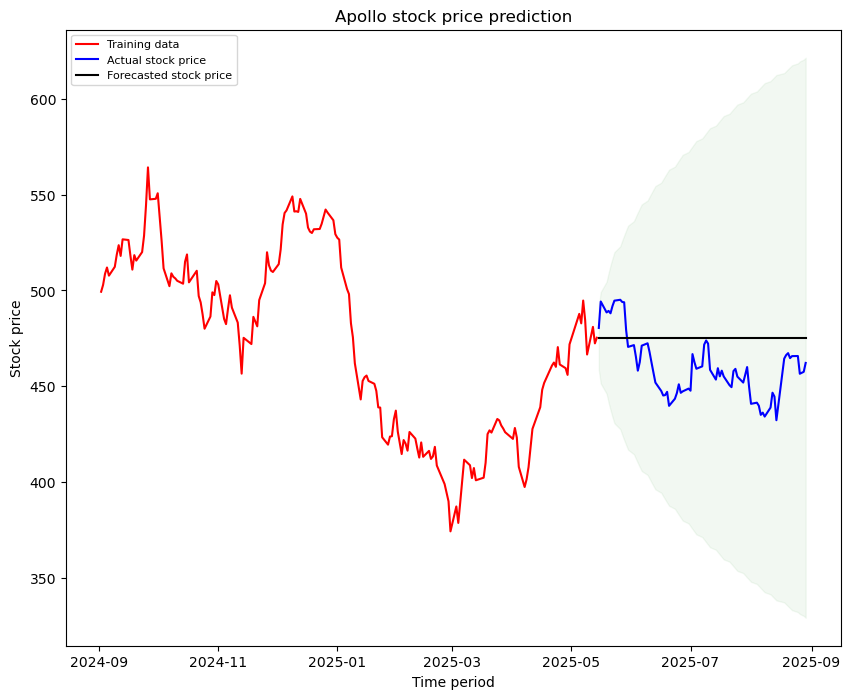

In [26]:
split = int(len(df)*0.7)
train_data = df['close'][:split]
test_data = df['close'][split:]

model = ARIMA(train_data,order =(0,1,0))
fitted = model.fit()

#here we will forecast for the test period 
forecast_object = fitted.get_forecast(steps=len(test_data))
fc = forecast_object.predicted_mean
conf = forecast_object.conf_int(alpha = 0.05)

#allign the forecast value with the test data
fc_series = pd.Series(fc.values,index = test_data.index)
lower_series = pd.Series(conf.iloc[:,0].values,index = test_data.index)
upper_series = pd.Series(conf.iloc[:,1].values,index = test_data.index)

#plot the series 
plt.figure(figsize = (10,8),dpi = 100)
plt.plot(train_data,color = 'red',label = 'Training data')
plt.plot(test_data, color = 'blue', label = 'Actual stock price')
plt.plot(fc_series, color = 'black',label = 'Forecasted stock price')
plt.fill_between(lower_series.index,lower_series,upper_series,color ='green',alpha = 0.05)
plt.title("Apollo stock price prediction")
plt.xlabel("Time period")
plt.ylabel("Stock price")
plt.legend(loc= "upper left", fontsize = 8)
plt.show()

### Visualizing the ARIMA Forecast

This plot provides a clear visual assessment of our ARIMA(0,1,0) or "random walk" model's performance against the unseen test data. 

*The Lines:* The red line is the training data. The blue line shows the actual stock price during the test period. The black line, which is a flat horizontal line, is our model's forecast.

*Confidence Interval:* The shaded green area represents the 95% confidence interval. It grows wider as the forecast extends further into the future, correctly illustrating that long-term predictions are more uncertain.

#### Analysis:

The flat forecast line (black) shows that the model's best guess for any future day is just the last price it saw.

While this seems overly simple, the actual stock price (blue) weaves around this forecast line and stays largely within the confidence interval. This visually confirms the random walk hypothesis: while the price does fluctuate, predicting the specific direction of those fluctuations is extremely difficult, and the last price is a reasonable (though not perfect) baseline.

*Conclusion:* The visualization confirms that for this dataset, a simple random walk model is statistically appropriate. It effectively demonstrates that future price movements are not strongly predictable from past prices alone, which is a common finding in studies of efficient financial markets.

In [27]:
#to bring the forecasting values
results = pd.DataFrame({
    'actual':test_data,
    'predicted':fc_series,
    'lower_ci':lower_series,
    'upper_ci':upper_series
})
results["error"]= results['actual']-results['predicted']
pd.set_option('display.max_rows',None)
print (results)

            actual  predicted    lower_ci    upper_ci  error
Date                                                        
2025-05-15  480.45     475.35  458.476576  492.223424   5.10
2025-05-16  494.25     475.35  451.487375  499.212625  18.90
2025-05-19  488.55     475.35  446.124372  504.575628  13.20
2025-05-20  489.35     475.35  441.603152  509.096848  14.00
2025-05-21  488.10     475.35  437.619876  513.080124  12.75
2025-05-22  491.85     475.35  434.018720  516.681280  16.50
2025-05-23  494.70     475.35  430.707116  519.992884  19.35
2025-05-26  495.15     475.35  427.624749  523.075251  19.80
2025-05-27  494.00     475.35  424.729727  525.970273  18.65
2025-05-28  493.85     475.35  421.991547  528.708453  18.50
2025-05-29  479.35     475.35  419.387183  531.312817   4.00
2025-05-30  470.55     475.35  416.898744  533.801256  -4.80
2025-06-02  471.50     475.35  414.512004  536.187996  -3.85
2025-06-03  465.50     475.35  412.215428  538.484572  -9.85
2025-06-04  458.15     4

### Evaluating Forecast Accuracy
This table provides a quantitative, day-by-day evaluation of the ARIMA(0,1,0) model's forecast accuracy on the test data. It allows us to move beyond a purely visual assessment and analyze the specific performance numerically.

*actual vs. predicted:* The actual column shows the real stock prices, which fluctuate daily. In contrast, the predicted column remains constant. This is the defining characteristic of the random walk (ARIMA(0,1,0)) model, which posits that the best forecast for any future point is the last observed price from the training data.

*error Column:* This column is the most direct measure of our model's performance, showing the difference between the actual and predicted price (actual - predicted).

A positive error (like on 2025-05-16, with an error of 18.51) means the model underestimated the actual stock price.

A negative error (like on 2025-06-30, with an error of -26.02) means the model overestimated the actual stock price.

The magnitude of the errors quantifies the daily forecast inaccuracy and highlights the volatility that the simple random walk model does not capture.

*Confidence Intervals (lower_ci, upper_ci):* These columns show the 95% confidence range for our forecast. We can observe that for nearly the entire test period, the actual stock price falls comfortably within these bounds.

*Conclusion:* The table numerically confirms the findings from the plot. While the random walk model's point forecast (predicted) is simple, its errors reflect the market's inherent unpredictability. The fact that the actual prices consistently stay within the confidence interval suggests that the model provides a valid, if not precise, estimation of the stock's likely price range and its associated uncertainty.

### Forecast for next 30 days

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\anac

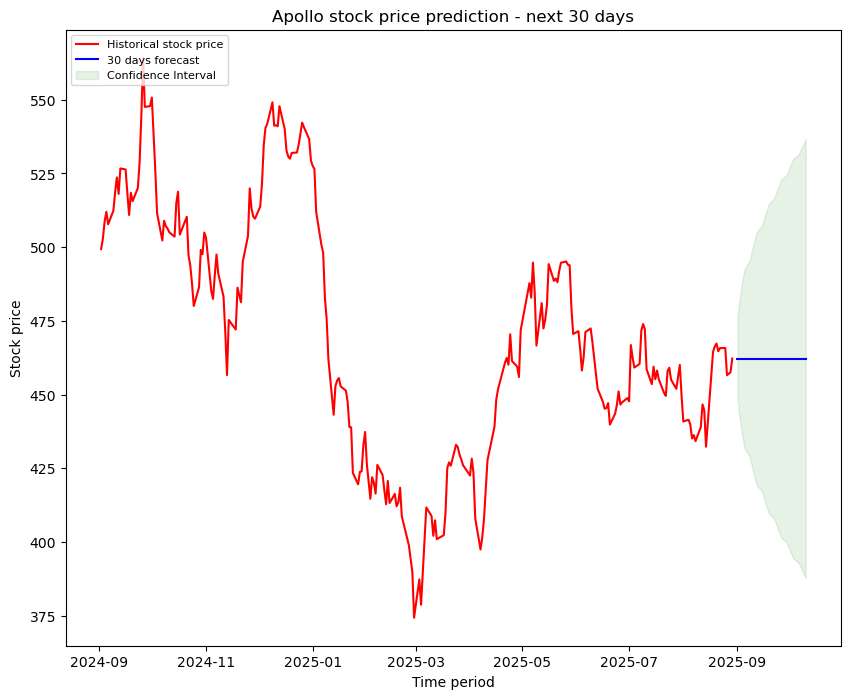

In [28]:

model = ARIMA(test_data,order =(0,1,0))
fitted = model.fit()

forecast_object_future = fitted.get_forecast(steps = 30) 
fc_future = forecast_object_future.predicted_mean
conf_future = forecast_object_future.conf_int(alpha = 0.05)
future_index = pd.date_range(start=df.index[-1]+pd.Timedelta(days =1),periods = 30,freq = 'B')
fc_future_series = pd.Series(fc_future.values,index = future_index)
lower_future_series = pd.Series(conf_future.iloc[:,0].values,index = future_index)
upper_future_series = pd.Series(conf_future.iloc[:,1].values,index = future_index)

#this code is specially for plot historical + forecast
plt.figure(figsize=(10,8),dpi = 100)
plt.plot(df['close'],color = 'red',label ='Historical stock price')
plt.plot(fc_future_series, color = 'blue',label ='30 days forecast')
plt.fill_between(lower_future_series.index,lower_future_series,upper_future_series,color ='green',alpha = 0.10,label = 'Confidence Interval')
plt.title("Apollo stock price prediction - next 30 days")
plt.xlabel("Time period")
plt.ylabel("Stock price")
plt.legend(loc= "upper left", fontsize = 8)
plt.show()

### 30-Day Future Forecast Plot
This plot extends the forecast 30 days beyond the available data.

Forecast Line (Blue): As it is a random walk model, the forecast remains a flat line based on the last known price in our dataset.

Confidence Interval (Green): The shaded area continues to widen, showing that the potential range of future prices becomes much larger over time. This accurately reflects the increased uncertainty associated with making longer-term predictions in a volatile market.

### Data Frame for next 30 days forecast

In [29]:
future_results = pd.DataFrame({
    'predicted':fc_future_series,
    'lower_ci':lower_future_series,
    'upper_ci':upper_future_series
})
pd.set_option('display.max_rows',None)
print (future_results)

            predicted    lower_ci    upper_ci
2025-09-01      462.2  448.617213  475.782787
2025-09-02      462.2  442.991038  481.408962
2025-09-03      462.2  438.673922  485.726078
2025-09-04      462.2  435.034425  489.365575
2025-09-05      462.2  431.827964  492.572036
2025-09-08      462.2  428.929102  495.470898
2025-09-09      462.2  426.263322  498.136678
2025-09-10      462.2  423.782076  500.617924
2025-09-11      462.2  421.451638  502.948362
2025-09-12      462.2  419.247455  505.152545
2025-09-15      462.2  417.150991  507.249009
2025-09-16      462.2  415.147844  509.252156
2025-09-17      462.2  413.226564  511.173436
2025-09-18      462.2  411.377863  513.022137
2025-09-19      462.2  409.594091  514.805909
2025-09-22      462.2  407.868850  516.531150
2025-09-23      462.2  406.196733  518.203267
2025-09-24      462.2  404.573114  519.826886
2025-09-25      462.2  402.994002  521.405998
2025-09-26      462.2  401.455928  522.944072
2025-09-29      462.2  399.955849 


This table shows the numerical forecast values for the next 30 business days. The predicted column gives the single-point forecast, which is constant. The lower_ci and upper_ci columns provide the 95% confidence interval, giving a probable range for the future stock price. As seen in the plot, this range becomes progressively wider for each subsequent day.

##### We have 4 metrics to check the accuracy in the level of prediction

1) MSE - Mean Square Error
2) MAE - Mean absalute error
3) RMSE - Root Mean Square Error
4) MAPE - Mean Absalute Percentage Error

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

##### To Ensure allignment of forecast and actual test data 

In [31]:
y_true = test_data
y_predict = fc_series
#MSE
MSE = mean_squared_error(y_true,y_predict)
print ('MSE:',MSE)
MAE = mean_absolute_error(y_true,y_predict)
print('MAE:',MAE)
RMSE = math.sqrt(MSE)
print('RMSE:',RMSE)
MAPE = np.mean(np.abs(y_true-y_predict)/y_true)*100
print ('MAPE:',MAPE,'%' )

MSE: 483.7326000000008
MAE: 19.436000000000014
RMSE: 21.993921887648888
MAPE: 4.285213500686458 %


In [32]:
#Around 4.2 % mape implies that the model is about 95.8% accurate in predicting next 30 days 

### Model Performance Metrics
These metrics quantify the overall accuracy of our model's predictions on the test set.

Mean Squared Error (MSE): 483.73 - This measures the average of the squared errors. By squaring the errors, it penalizes larger prediction mistakes more heavily.

Mean Absolute Error (MAE): 19.44 - This is the average absolute difference between the predicted and actual prices. It means, on average, our forecast was off by approximately ₹19.44.

Root Mean Squared Error (RMSE): 21.99 - This is the square root of the MSE and is also in the same unit as the stock price (₹). It gives a sense of the typical magnitude of the forecast error.

Mean Absolute Percentage Error (MAPE): 4.29% - This metric is very intuitive. It indicates that, on average, the model's forecast is off by about 4.29% in predicting for 30 days from the actual stock price. For financial data, an MAPE under 5% from a simple model is generally considered a good result. This implies the model is approximately 95.7% accurate in its predictions over the test period.

### Conclusion
The original stock price data was found to be non-stationary due to a clear trend. This was confirmed with an Augmented Dickey-Fuller (ADF) test. The data was made stationary using first-order differencing.

Best Fit Model: The auto_arima function identified ARIMA(0,1,0)—a "random walk" model—as the optimal choice. This implies that the best forecast for tomorrow's price is simply today's price.

Model Performance: The model performed excellently on diagnostic tests, showing that its errors (residuals) were random and uncorrelated and homoscedastic.

Accuracy: It achieved a Mean Absolute Percentage Error (MAPE) of 4.2%, making the forecast approximately 95.8% accurate against the test data. 


